<ipython-input-1-cdc42ba03d8e>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.86      0.92        14

    accuracy                           0.95        42
   macro avg       0.97      0.93      0.94        42
weighted avg       0.96      0.95      0.95        42

Confusion Matrix:
[[28  0]
 [ 2 12]]
Accuracy Score: 0.9523809523809523


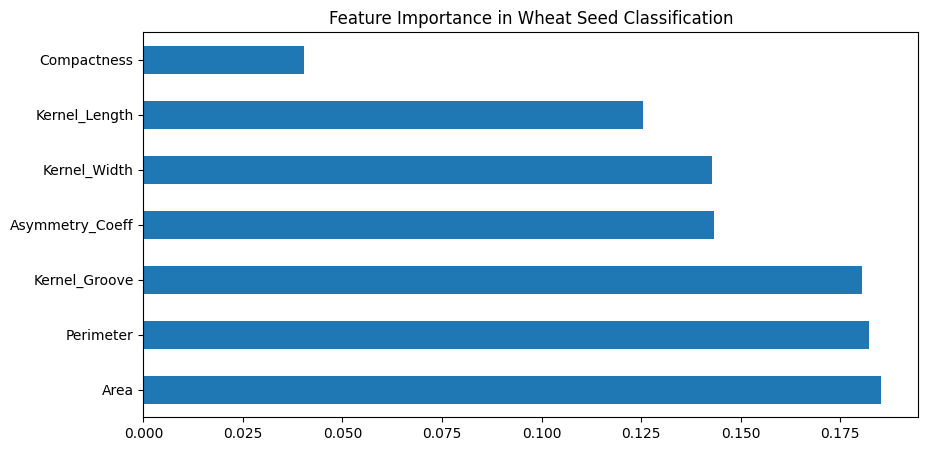

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Wheat Seeds dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["Area", "Perimeter", "Compactness", "Kernel_Length", "Kernel_Width", "Asymmetry_Coeff", "Kernel_Groove", "Target"]
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# Convert target labels (1, 2, 3) to binary classification (1 vs. not 1)
df['Target'] = (df['Target'] == 1).astype(int)

# Split data into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualize feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
feature_importance.nlargest(7).plot(kind='barh')
plt.title("Feature Importance in Wheat Seed Classification")
plt.show()
